<a href="https://colab.research.google.com/github/dharunS05/Python/blob/main/Project_6_loan_Eligible_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Load the dataset

In [4]:
#import the dataset
loan_train_dataset = pd.read_csv('/content/loan-train.csv')
loan_test_dataset = pd.read_csv('/content/loan-test.csv')

In [6]:
loan_train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_test_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
#shape of training and testing data
print(loan_train_dataset.shape)
print(loan_test_dataset.shape)

(614, 13)
(367, 12)


In [11]:
#counting null values both training and testing data
print(loan_train_dataset.isnull().sum())
print()
print(loan_test_dataset.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [14]:
#drop the Null and non assign values using dropna
loan_train_dataset = loan_train_dataset.dropna()
loan_test_dataset = loan_test_dataset.dropna()

In [15]:
#counting null values both training and testing data
print(loan_train_dataset.isnull().sum())
print()
print(loan_test_dataset.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Preprocessing  Train Dataset


---

1.Visulization

In [16]:
#loan_train_dataset first 5 datas
loan_train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

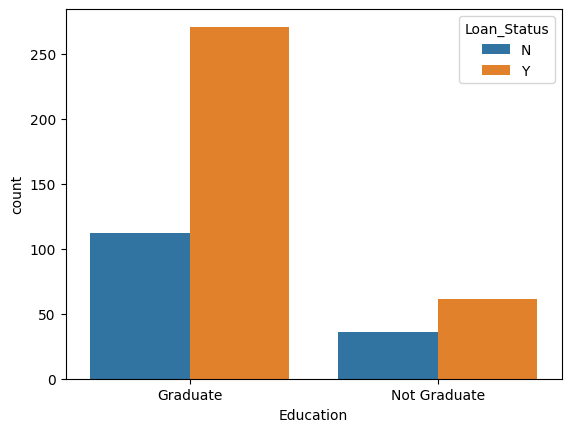

In [17]:
# Education vs Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_train_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

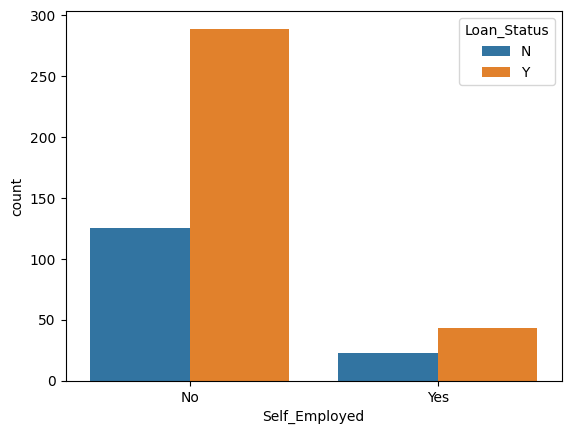

In [18]:
# Self_Employed vs Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_train_dataset)

<Axes: xlabel='Gender', ylabel='count'>

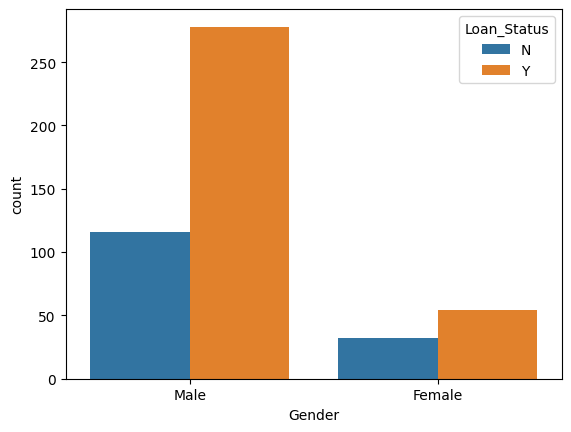

In [19]:
# Gender vs Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_train_dataset)

**Next Categories values into features**

In [21]:
loan_train_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [22]:
#Label Encoding
loan_train_dataset = loan_train_dataset.replace(to_replace='3+',value=4)
loan_train_dataset = loan_train_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},
                                                 'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},
                                                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Loan_Status':{'Y':1,'N':0}})

/tmp/ipython-input-22-2480752085.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_train_dataset = loan_train_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},


In [24]:
loan_train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan_train_dataset['ApplicantIncome']=scaler.fit_transform(loan_train_dataset['ApplicantIncome'].values.reshape(-1,1))
loan_train_dataset['CoapplicantIncome']=scaler.fit_transform(loan_train_dataset['CoapplicantIncome'].values.reshape(-1,1))
loan_train_dataset['LoanAmount']=scaler.fit_transform(loan_train_dataset['LoanAmount'].values.reshape(-1,1))
loan_train_dataset['Loan_Amount_Term']=scaler.fit_transform(loan_train_dataset['Loan_Amount_Term'].values.reshape(-1,1))
loan_train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0
2,LP001005,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,1
3,LP001006,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1
4,LP001008,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,1
5,LP001011,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,2,1


Split features and label

In [27]:
X = loan_train_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = loan_train_dataset['Loan_Status']

In [28]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Model -> Support Vector Machine


---

it better for small and binary classification models

In [41]:
svc = svm.SVC(kernel='linear')

In [42]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

Training Data spliting data Accuracy Check

In [43]:
#training data Accuracy
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Training Data Accuracy: ",training_data_accuracy)

Training Data Accuracy:  0.8046875


In [44]:
#test data Accuarcy
X_test_prediction  = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Test Data Accuracy: ",test_data_accuracy)

Test Data Accuracy:  0.8229166666666666


Labeled data X_test prediction check

create prediction technique

In [65]:

input_data = X_test.iloc[1]
y_pred = svc.predict([input_data])
print(y_pred)

if y_pred[0] == 0:
  print("Loan Not Approved")
else:
  print("Loan Approved")

[1]
Loan Approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test Data Preprocess and predict accuracy

In [45]:
# categorical value to features
loan_test_dataset = loan_test_dataset.replace(to_replace='3+',value=4)
loan_test_dataset = loan_test_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},
                                                 'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},
                                                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

In [46]:
loan_test_dataset['ApplicantIncome']=scaler.fit_transform(loan_test_dataset['ApplicantIncome'].values.reshape(-1,1))
loan_test_dataset['CoapplicantIncome']=scaler.fit_transform(loan_test_dataset['CoapplicantIncome'].values.reshape(-1,1))
loan_test_dataset['LoanAmount']=scaler.fit_transform(loan_test_dataset['LoanAmount'].values.reshape(-1,1))
loan_test_dataset['Loan_Amount_Term']=scaler.fit_transform(loan_test_dataset['Loan_Amount_Term'].values.reshape(-1,1))
loan_test_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,0.226382,-0.643891,-0.449565,0.264392,1.0,2
1,LP001022,1,1,1,1,0,-0.326480,-0.011908,-0.181092,0.264392,1.0,2
2,LP001031,1,1,2,1,0,0.075830,0.114489,1.194835,0.264392,1.0,2
4,LP001051,1,0,0,0,0,-0.284660,-0.643891,-0.986512,0.264392,1.0,2
5,LP001054,1,1,0,0,1,-0.516970,0.797873,0.255178,0.264392,1.0,2


In [47]:
prediction = svc.predict(loan_test_dataset.drop(columns=['Loan_ID'],axis=1))

In [48]:
print(prediction)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


Save Model using pickle

In [49]:
import pickle
with open('loan_model.pkl','wb') as f:
  pickle.dump(svc,f)